# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [2]:
pip install glove_python_binary

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [4]:
spam = pd.read_csv('spam.csv')

In [5]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [6]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
spam['v1'].value_counts()/len(spam)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

레이블의 비율은 ham이 약 86.59%, spam이 약 13.41%

In [9]:
spam['v2'].duplicated(keep = 'first').sum()

403

403개의 중복 데이터 존재.

In [10]:
spam.drop_duplicates(subset=['v2'], inplace=True)
spam['v2'].duplicated(keep = 'first').sum()

0

중복 데이터 제거

## Tokenizing


In [11]:
import nltk

### 단어 토큰화 (word_tokenize)
기본적으로 띄어쓰기를 기준으로 함. 영어는 보통 띄어쓰기로 토큰이 구분되기 때문에 이 토크나이저를 사용해도 괜찮. 

In [12]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [13]:
from nltk.tokenize import TreebankWordTokenizer
TreebankWordTokenizer().tokenize(spam.iloc[5]['v2'])

['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [14]:
from nltk.tokenize import WordPunctTokenizer  
WordPunctTokenizer().tokenize(spam.iloc[5]['v2'])

['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'",
 's',
 'been',
 '3',
 'week',
 "'",
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'",
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å',
 '£',
 '1',
 '.',
 '50',
 'to',
 'rcv']

위의 두 tokenizer와는 다르게 '를 따로 분리함.  'å£1.50' 도 다 따로 분리해서 파악함.

### 서브 워드 토큰화(transformer의 BertTokenizer
서브 워드 토큰화는 "자주 등장하는 단어는 그대로 놔두고, 자주 등장하지 않은 단어는 의미있는 서브 워드 토큰들로 분절한다."라는 원칙에 기반을 둔 알고리즘. 교착어에 있어서 효과적으로 적용 가능. 

In [15]:
from transformers import BertTokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_tokenizer.tokenize(spam.iloc[5]['v2'])

['free',
 '##ms',
 '##g',
 'hey',
 'there',
 'darling',
 'it',
 "'",
 's',
 'been',
 '3',
 'week',
 "'",
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'i',
 "'",
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'tb',
 'ok',
 '!',
 'xx',
 '##x',
 'st',
 '##d',
 'ch',
 '##gs',
 'to',
 'send',
 ',',
 'a',
 '##£',
 '##1',
 '.',
 '50',
 'to',
 'rc',
 '##v']

FreeMsg에서 Msg를 bert tokenizer가 인식 못하는 문제 발생..

In [16]:
from transformers import XLNetTokenizer
XL_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
XL_tokenizer.tokenize(spam.iloc[5]['v2'])

['▁Free',
 'M',
 's',
 'g',
 '▁Hey',
 '▁there',
 '▁darling',
 '▁it',
 "'",
 's',
 '▁been',
 '▁3',
 '▁week',
 "'",
 's',
 '▁now',
 '▁and',
 '▁no',
 '▁word',
 '▁back',
 '!',
 '▁I',
 "'",
 'd',
 '▁like',
 '▁some',
 '▁fun',
 '▁you',
 '▁up',
 '▁for',
 '▁it',
 '▁still',
 '?',
 '▁T',
 'b',
 '▁',
 'ok',
 '!',
 '▁X',
 'x',
 'X',
 '▁',
 'st',
 'd',
 '▁',
 'ch',
 'gs',
 '▁to',
 '▁send',
 ',',
 '▁a',
 '£',
 '1',
 '.',
 '50',
 '▁to',
 '▁',
 'rc',
 'v']

서브 워드 토큰화와 단어 토큰화 중 FreeMsg같은 단어를 잡아내는 단어 토큰화를 사용하기로 결정하였고, 그 중 불용어를 잘 분리해내는 WordPunctTokenizer를 사용하기로 했다.
그리고 불용어를 제거하였다.

In [17]:
import re

def delStopwords(data):
    text = re.sub('[^a-zA-Z]', ' ', data).lower() # 알파벳을 제외한 특수문자 등 제거
    return text

spam.v2 = spam.v2.apply(delStopwords)

In [18]:
spam.v2

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in   a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the  nd time we have tried   contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: v2, Length: 5169, dtype: object

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
def tokenize_v2(data):
    tokenize = WordPunctTokenizer().tokenize(data) # WordPunctTokenizer이용
    words = [word for word in tokenize if word not in stop_words] # 불용어 제거
    return words

In [21]:
spam['v2_tokens'] = spam['v2'].apply(tokenize_v2)
spam.head()

,v1,v2,v2_tokens
0,ham,go until jurong point crazy available only ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i don t think he goes to usf he lives aro...,"[nah, think, goes, usf, lives, around, though]"


In [22]:
spam['v2_tokens']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: v2_tokens, Length: 5169, dtype: object

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

word embedding 모델은 단어를 벡터로 바꾸는 모델이다.

### Glove

In [23]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(spam['v2_tokens'], window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [24]:
spam[spam['v1']=='spam']['v2']

2       free entry in   a wkly comp to win fa cup fina...
5       freemsg hey there darling it s been   week s n...
8       winner   as a valued network customer you have...
9       had your mobile    months or more  u r entitle...
11      six chances to win cash  from     to        po...
                              ...                        
5537    want explicit sex in    secs  ring            ...
5540    asked  mobile if      chatlines inclu in free ...
5547    had your contract mobile    mnths  latest moto...
5566    reminder from o   to get      pounds free call...
5567    this is the  nd time we have tried   contact u...
Name: v2, Length: 653, dtype: object

In [25]:
spam.iloc[2,1]

'free entry in   a wkly comp to win fa cup final tkts   st may       text fa to       to receive entry question std txt rate t c s apply            over   s'

spam으로 분류된 문자열에 단어 'free'가 많이 포함됨을 확인할 수 있다.

In [26]:
# 전체 데이터로 glove 학습했을 때 free와 유사한 단어들
print(glove.most_similar("free"))

[('reply', 0.9858476623977057), ('text', 0.966229095057663), ('call', 0.9630922185192502), ('please', 0.9622311716135018)]


In [27]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(spam[spam['v1']=='spam']['v2_tokens'], window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [28]:
# spam 데이터로 glove 학습했을 때 free와 유사한 단어들
print(glove.most_similar("free"))

[('mobile', 0.9652447463324685), ('reply', 0.9497748623696302), ('text', 0.9299392400356543), ('call', 0.9081891430475948)]


#### Glove 
- free와 유사한 단어들
    - 전체 데이터 : reply, text, call, please
    - spam 데이터 : mobile, reply, text, call

<br>전체 데이터에서는 단어 please가 free와 유사하다고 나왔지만, spam에서는 please가 나오지 않고 mobile이 유사하다고 나왔다. 

### FastText

In [29]:
from gensim.models import FastText

model = FastText(spam['v2_tokens'], size=100, window=5, min_count=5, workers=4, sg=1)

In [30]:
# 전체 데이터로 FastText 학습했을 때 free와 유사한 단어들
model.wv.most_similar("free")

[('mob', 0.9981560111045837),
 ('nokia', 0.9978150129318237),
 ('mobiles', 0.9971296787261963),
 ('reply', 0.9970870018005371),
 ('tones', 0.996720552444458),
 ('mobileupd', 0.9960302710533142),
 ('tone', 0.9959238171577454),
 ('txts', 0.9958552122116089),
 ('entry', 0.9944138526916504),
 ('weekly', 0.993932843208313)]

In [31]:
from gensim.models import FastText

model = FastText(spam[spam['v1']=='spam']['v2_tokens'], size=100, window=5, min_count=5, workers=4, sg=1)

In [32]:
# spam 데이터로 FastText 학습했을 때 free와 유사한 단어들
model.wv.most_similar("free")

[('ringtones', 0.9997731447219849),
 ('games', 0.9997722506523132),
 ('phones', 0.9997623562812805),
 ('game', 0.9997594952583313),
 ('ringtone', 0.9997584223747253),
 ('text', 0.9997255802154541),
 ('nokia', 0.9997239112854004),
 ('tones', 0.9997206926345825),
 ('phone', 0.9997012615203857),
 ('freemsg', 0.9996906518936157)]

In [33]:
from gensim.models import FastText

model = FastText(spam[spam['v1']=='spam']['v2_tokens'], size=100, window=10, min_count=5, workers=4, sg=1)

#### FastText
- free와 유사한 단어들
    - 전체 데이터 : nokia, mob, tone, tones, reply, mobiles, mobileupd, txt, txts, wk
    - spam 데이터 : rightones, games, phones, game, rightone, text, nokia, tones, phone, freemsg
    
<br> nokia, mobiles, rightones, game, phone이 많이 보였다. 모바일 게임이나 핸드폰과 관련된 단어들이 많아 핸드폰 관련 광고였을 것이라고 추측해보았다.

In [34]:
# spam 데이터로 FastText 학습했을 때 free와 유사한 단어들
model.wv.most_similar("free")

[('mob', 0.9990314841270447),
 ('text', 0.9985702037811279),
 ('tones', 0.9985102415084839),
 ('new', 0.9983240365982056),
 ('phones', 0.9982406497001648),
 ('ringtones', 0.998216986656189),
 ('get', 0.998084545135498),
 ('ringtone', 0.9979503750801086),
 ('nokia', 0.9978426694869995),
 ('phone', 0.9978072643280029)]

window 수를 더 늘려봤을 때, new라는 단어가 등장한 것으로 보아 새로운 핸드폰을 광고하거나 새로운 ringhtone?을 광고하는 것 같았다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [40]:
import numpy as np

In [64]:
v2_tokens_spam = spam[spam['v1']=='spam']['v2_tokens'].to_list()
v2_tokens_spam = np.concatenate(v2_tokens_spam).tolist()
v2_tokens_spam

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'txt',
 'csh',
 'send',
 'cost',
 'p',
 'day',
 'days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'www',
 'dbuk',
 'net',
 'lccltd',
 'pobox',
 'ldnw',
 'rw',
 'xxxmobilemovieclub',
 'use',
 'credit'

In [65]:
from nltk import FreqDist
fdist = FreqDist(v2_tokens)

In [66]:
spam_cnts = pd.DataFrame(fdist.most_common(100))
spam_cnts.columns = ['token', 'freq']
spam_cnts

,token,freq
0,call,322
1,free,197
2,p,158
3,u,157
4,txt,141
...,...,...
95,nd,20
96,national,19
97,texts,19
98,delivery,18


In [67]:
v2_tokens_ham = spam[spam['v1']=='ham']['v2_tokens'].to_list()
v2_tokens_ham = np.concatenate(v2_tokens_ham).tolist()
v2_tokens_ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 'copy',
 'friends',
 'callertune',
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make',
 'v'

In [68]:
from nltk import FreqDist
fdist_ham = FreqDist(v2_tokens_ham)

In [69]:
ham_cnts = pd.DataFrame(fdist_ham.most_common(100))
ham_cnts.columns = ['token', 'freq']
ham_cnts

,token,freq
0,u,922
1,get,301
2,gt,288
3,lt,287
4,ok,255
...,...,...
95,pick,58
96,buy,58
97,tonight,57
98,soon,56


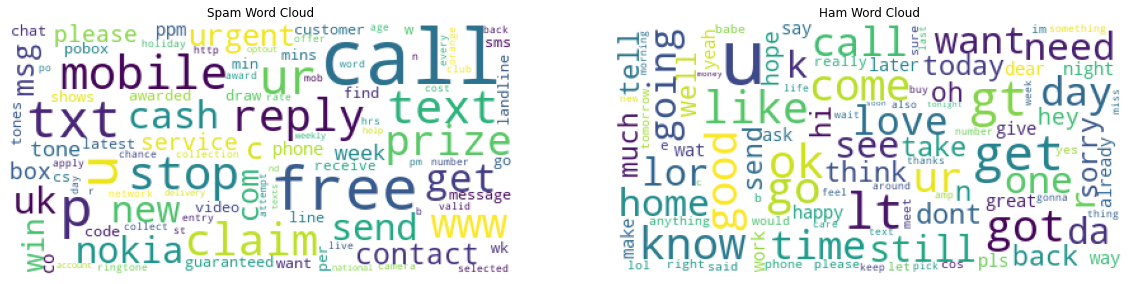

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_font_size=60)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Spam Word Cloud')
spam_dict = dict(zip(spam_cnts['token'], spam_cnts['freq']))
cloud = wc.generate_from_frequencies(spam_dict)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('Ham Word Cloud')
ham_dict = dict(zip(ham_cnts['token'], ham_cnts['freq']))
cloud = wc.generate_from_frequencies(ham_dict)
plt.axis('off')
plt.imshow(cloud)

레이블이 spam인 데이터의 빈도수가 높은 token들을 확인했을 때 call, mobile, cash, free가 눈에 보였고, www나 nokia 같은 단어가 있는 것으로 보아 광고성 문자가 포함되어 있음을 알 수 있었다. 또한 customer, apply, contact, prize와 같은 광고성 단어들이 많이 보였다.<br>

반면 레이블이 ham인 데이터의 빈도수가 높은 token들을 확인했을 때에는 like, love, good, happy, sorry 과 같은 감정과 관련된 단어들이 보였으며, today, day, night 과 같은 시간과 관련된 단어가 있는 것으로 보아 약속과 관련된 대화가 오고갔음을 추측할 수 있다. 즉, 일상과 관련된 단어들이 많아 보였다.